# KC house price prediction

### Model : Linear/Multiple Regression
### Additions: Assessing Performance (RSS)

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


#### Upload the data

In [2]:
df = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
df = df.sort_values(['sqft_living','price'])

#### Func to create polynomial features

In [3]:
def polynomial_df(col, k):
    df = pd.DataFrame()
    df['power_1'] = col
    for i in range(2, k+1):
        df['power_' + str(i)] = np.power(col,i)
    return df

### Model 1 - 1st degree polynomial

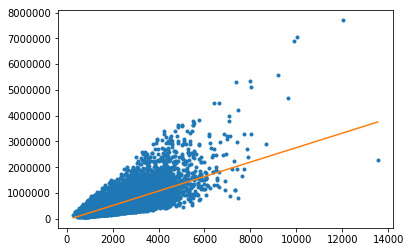

In [4]:
poly1_data = polynomial_df(df['sqft_living'],1)
poly1_data['price'] = df['price']

model1 = LinearRegression().fit(poly1_data['power_1'].to_frame(), poly1_data['price'])

%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data['power_1'].to_frame()),'-')


### Model 2 - 2nd degree polynomial

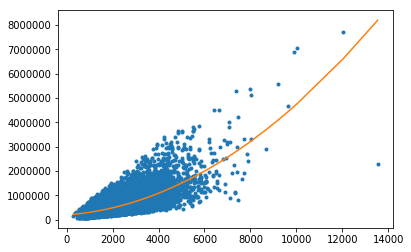

In [6]:
poly2_data = polynomial_df(df['sqft_living'],2)
poly2_data['price'] = df['price']

# fit model
model2 = LinearRegression().fit(poly2_data[['power_1', 'power_2']], poly2_data['price'])

#plot
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data[['power_1', 'power_2']]),'-')

### Model 3 - 3rd degree polynomial



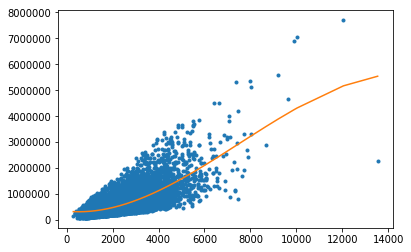

In [7]:
poly3_data = polynomial_df(df['sqft_living'],3)
poly3_data['price'] = df['price']

# fit model
model3 = LinearRegression().fit(poly3_data[['power_1', 'power_2', 'power_3']], poly3_data['price'])

#plot
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(poly3_data[['power_1', 'power_2', 'power_3']]),'-')

### Model 4 - 15th degree polynomial

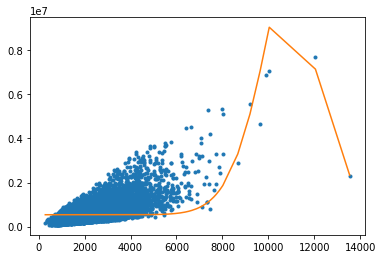

In [8]:
poly15_data = polynomial_df(df['sqft_living'],15)
poly15_data['price'] = df['price']

# fit model
model4 = LinearRegression().fit(poly15_data.drop(columns=['price']), poly15_data['price'])

#plot
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
         poly15_data['power_1'], model4.predict(poly15_data.drop(columns=['price'])),'-')

### Evaluating the models

In [9]:
set1 = pd.read_csv("wk3_kc_house_set_1_data.csv")
set2 = pd.read_csv("wk3_kc_house_set_2_data.csv")
set3 = pd.read_csv("wk3_kc_house_set_3_data.csv")
set4 = pd.read_csv("wk3_kc_house_set_4_data.csv")

l = [set1, set2,set3,set4]

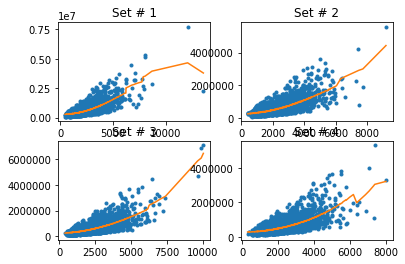

In [10]:
mod = []
for i,s in zip(range(1,5),l):
    current_set = polynomial_df(s['sqft_living'],15)
    mod.append(LinearRegression().fit(current_set, s['price']))
    plt.subplot(2, 2, i)
    plt.title('Set # {}'.format(i))
    plt.plot(current_set['power_1'],s['price'],'.',
         current_set['power_1'], mod[i-1].predict(current_set),'-')

In [11]:
train_data = pd.read_csv("wk3_kc_house_train_data.csv",dtype = dtype_dict)
validation_data = pd.read_csv("wk3_kc_house_valid_data.csv",dtype = dtype_dict)
test_data = pd.read_csv("wk3_kc_house_test_data.csv",dtype = dtype_dict)

In [12]:
vals = []

Y_train = train_data['price']

for i in range(1,16):
    X_train = polynomial_df(train_data['sqft_living'],i)
    model = LinearRegression().fit(X_train, Y_train)        
    rss = np.sum((Y_train - model.predict(X_train))**2)
    print("RSS for degree {} is: {}".format(i, rss))
    vals.append(rss)

RSS for degree 1 is: 706999812596193.4
RSS for degree 2 is: 617681432824605.2
RSS for degree 3 is: 617670141211080.6
RSS for degree 4 is: 617637641573565.5
RSS for degree 5 is: 617649099297426.4
RSS for degree 6 is: 616209024361704.4
RSS for degree 7 is: 617631990814176.6
RSS for degree 8 is: 637786818464491.5
RSS for degree 9 is: 684830987236546.1
RSS for degree 10 is: 751989187006060.5
RSS for degree 11 is: 826146260517244.2
RSS for degree 12 is: 896843453337895.5
RSS for degree 13 is: 1143335158761444.2
RSS for degree 14 is: 1166042749408685.5
RSS for degree 15 is: 1183400438743912.2


In [13]:
X_train = polynomial_df(train_data['sqft_living'],6)
model = LinearRegression().fit(X_train, Y_train)   
rss = np.sum((validation_data.price - model.predict(polynomial_df(validation_data['sqft_living'],6)))**2)
print(rss)

566268592707004.6
